In [13]:
import pickle
import numpy as np
import pylab as plt
import os
from scipy.optimize import curve_fit
%matplotlib inline

In [14]:
# Quick function to add 2 dictionaries elementwise
def AddDicts(dat1,dat2):
    dat3={}
    for k in dat1.keys():
        dat3[k]=dat1[k]+dat2[k]
    return(dat3)

ExposureTime=0.5

In [15]:
dat={}
Root="/Users/ben.jones/Documents/Data/MicroscopePaper/FoundSpots/On/"
for path in os.listdir(Root):
    #if('Vac' in path):
        FileName=Root+"/"+path
    
        try:
            f=open(FileName,'rb')
            dat[path]=pickle.load(f)
            f.close()
        except:
            print("no file at " +FileName)
            
datOff={}
Root="/Users/ben.jones/Documents/Data/MicroscopePaper/FoundSpots/Off/"
for path in os.listdir(Root):
    #if('Vac' in path):
        FileName=Root+"/"+path    
        try:
            f=open(FileName,'rb')
            datOff[path]=pickle.load(f)
            f.close()
        except:
            print("no file at " +FileName)

no file at /Users/ben.jones/Documents/Data/MicroscopePaper/FoundSpots/On//.DS_Store


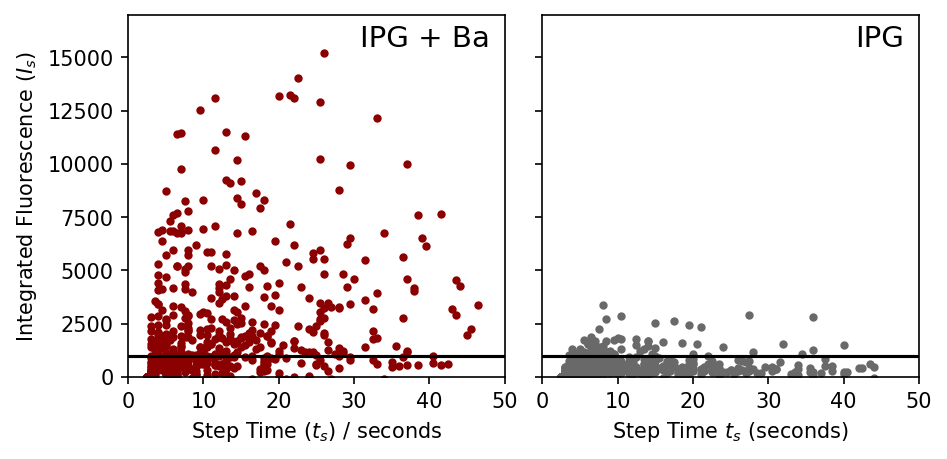

In [16]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3),dpi=150,sharey=True)
fig.tight_layout()
plt.subplots_adjust(wspace=0.1)
sets=['WithBa_Xe10bar.dat']
for k in sets:
    axes[0].plot(np.array(dat[k]['Times'])*ExposureTime,np.array(dat[k]['IntegralBefore'])/np.array(dat[k]['Times']),'.',color='DarkRed')
    #plt.title(k)
    axes[0].set_xlabel("Step Time ($t_s$) / seconds")
    axes[0].set_ylabel("Integrated Fluorescence ($I_s)$")
    axes[0].set_ylim(0,17000)
    axes[0].set_xlim(0,50)
    axes[0].plot([0,500],[1000,1000],'-',color='black')
    axes[0].text(48,15500,"IPG + Ba",ha='right',fontsize=14)
    


sets=['NoBa_Xe10bar.dat']
for k in sets:
    axes[1].plot(np.array(datOff[k]['Times'])*ExposureTime,np.array(datOff[k]['IntegralBefore'])/np.array(datOff[k]['Times']),'.',color='dimgrey')
    #plt.title(k+",  ")
    axes[1].set_xlabel("Step Time $t_s$ (seconds)")
    axes[1].set_ylabel("Integrated Fluorescence $I_s$ (arb. units)")
    axes[1].set_ylim(0,17000)
    axes[1].set_xlim(0,50)
    axes[1].plot([0,100],[1000,1000],'-',color='black')
    #axes[1].set_yticks([])
    axes[1].set_ylabel("")
    axes[1].text(48,15500,"IPG",ha='right',fontsize=14)
plt.savefig("Plots/SpotPlot.eps",dpi=200,bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


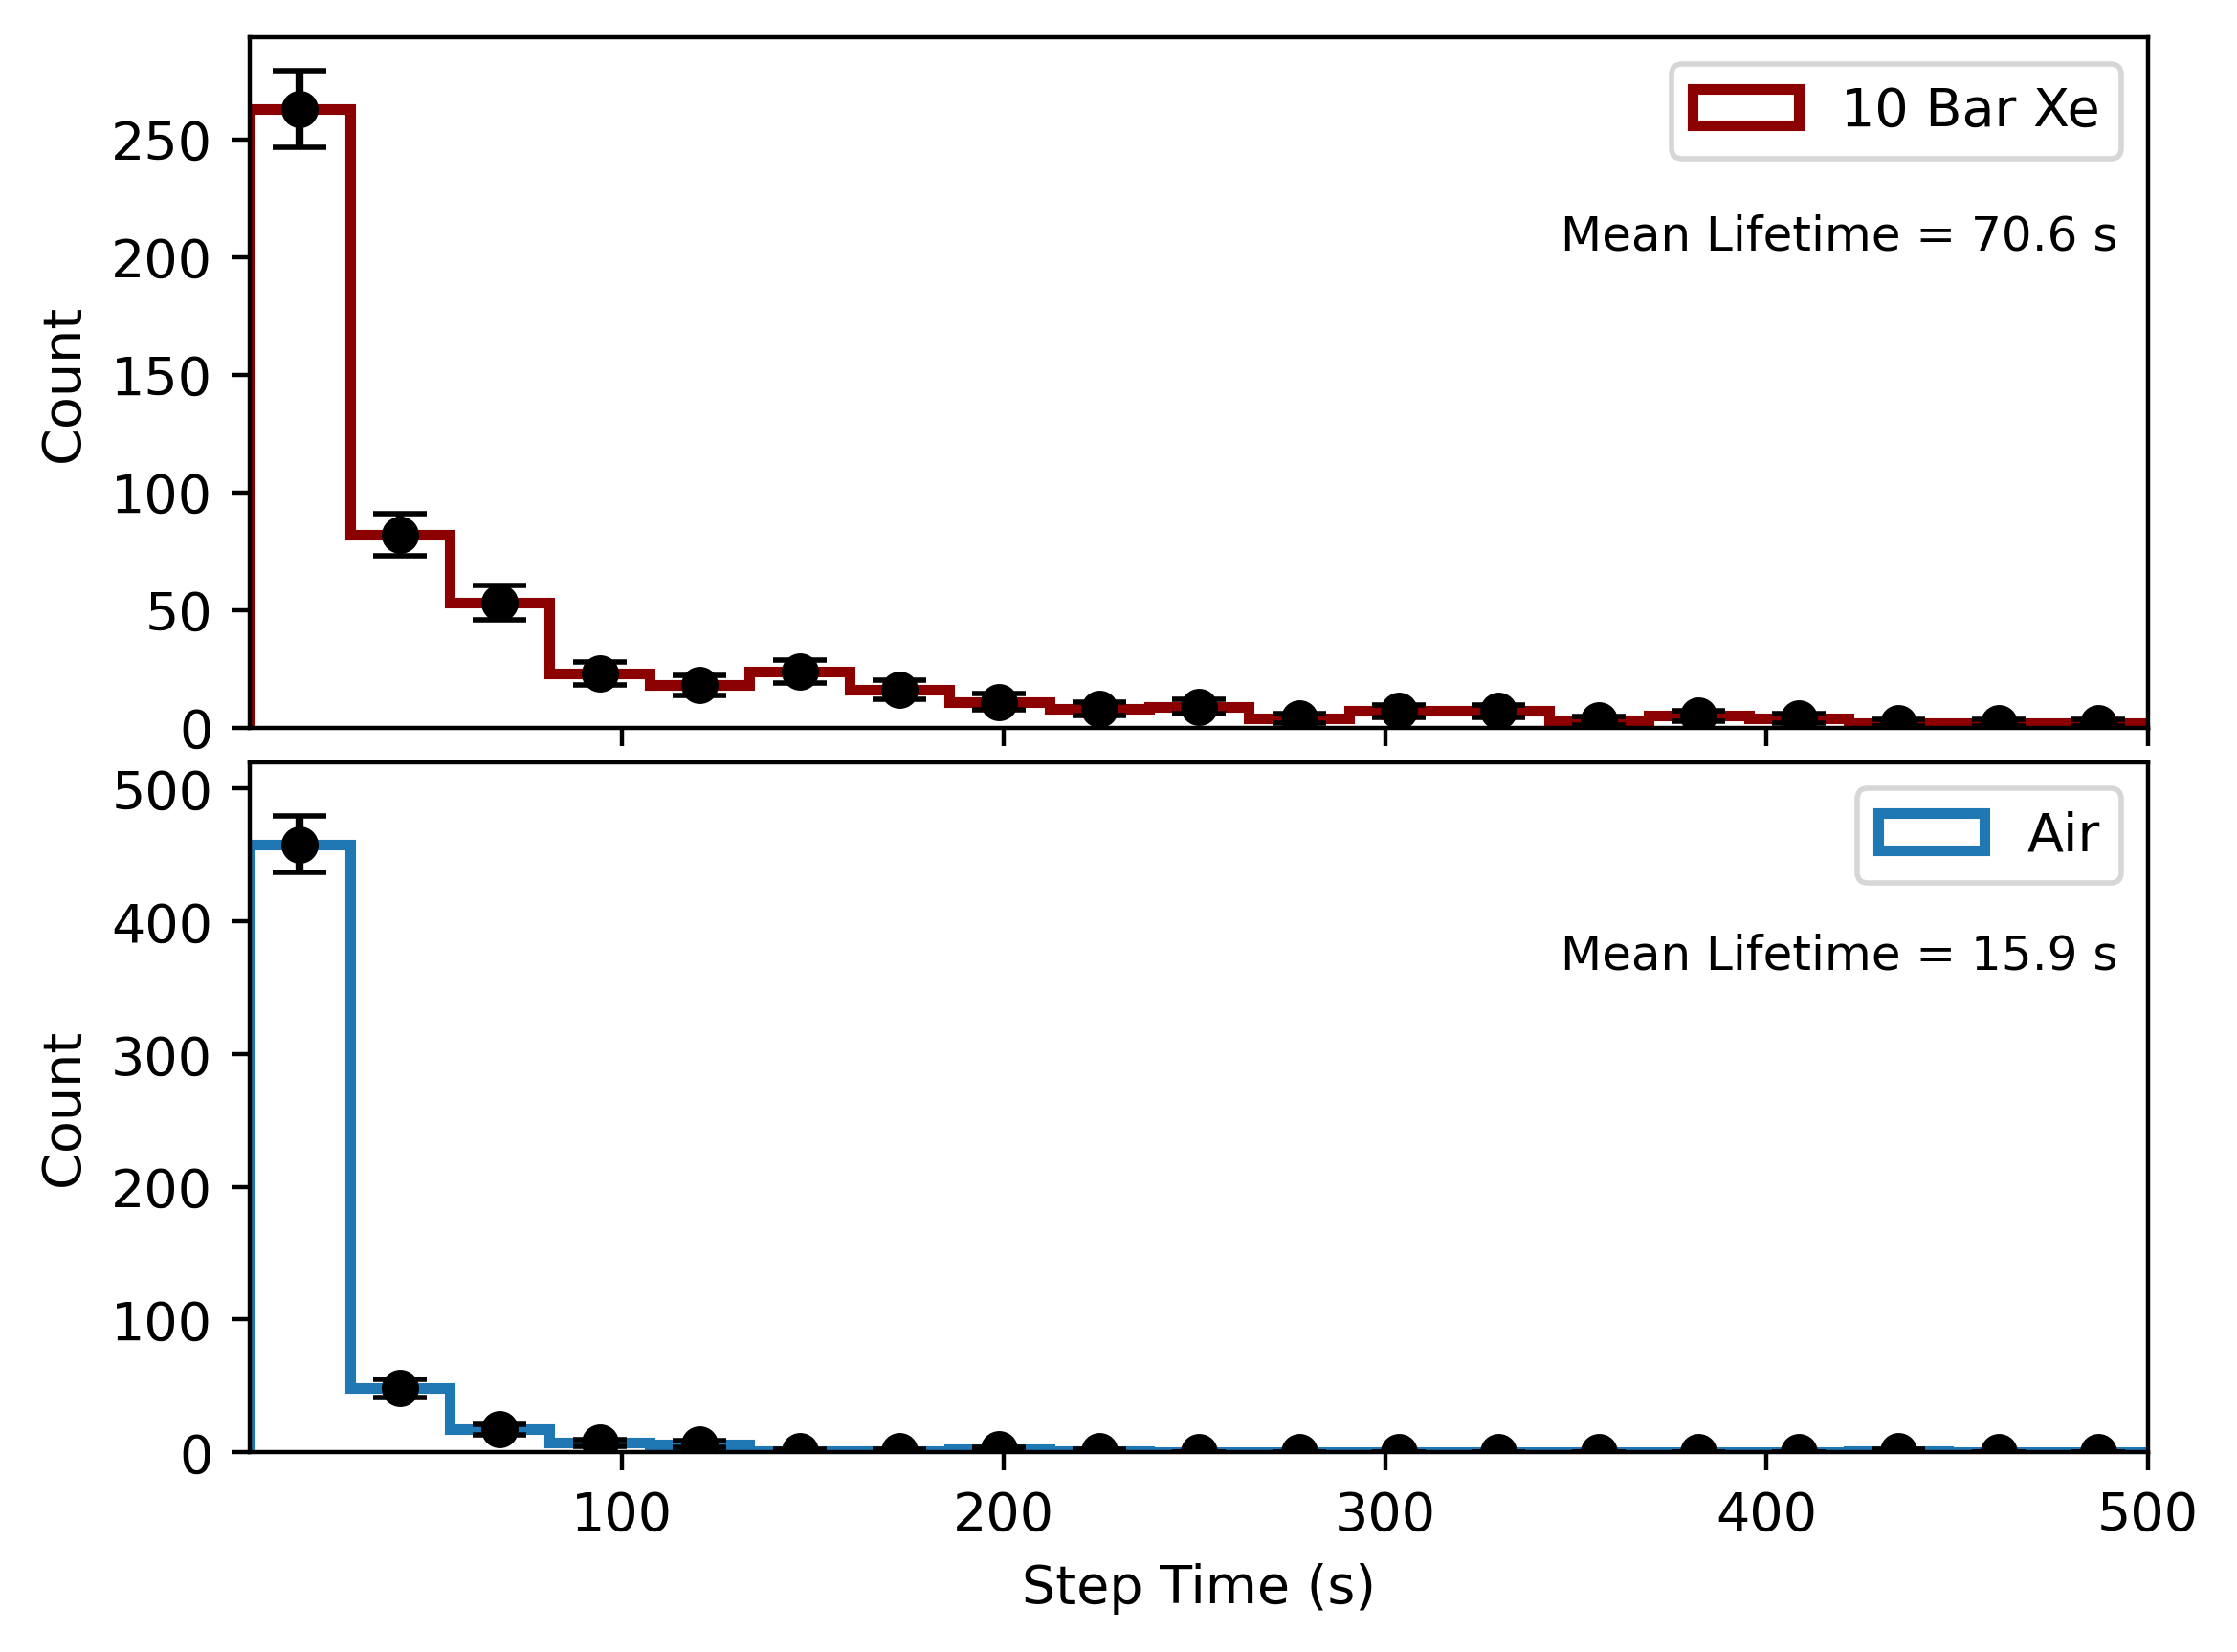

In [17]:
blanks=5
fig, axs = plt.subplots(2, 1, sharex=True,dpi=400)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.05)
Which='WithBa_Xe10bar_Long_2.dat'
sel=(np.array(dat[Which]['Hs'])>1000)

h=axs[0].hist(np.array(dat[Which]['Times'])[sel]*ExposureTime,histtype='step',bins=np.linspace(2.5,500,20),color='DarkRed',label='10 Bar Xe',linewidth=2)
xsXe=(h[1][1:]+h[1][:-1])/2
ysXe=h[0]
axs[0].errorbar(xsXe,ysXe,np.sqrt(ysXe),fmt='o',capsize=5,color='black')
axs[0].set_xlim(2.5,500)
ymax=290
#axs[0].set_ylim(0,ymax)
MeanXeLifetime=np.mean(np.array(dat[Which]['Times'])[sel]-blanks)*ExposureTime
axs[0].text(500,ymax*0.7,"Mean Lifetime = " + str(round(MeanXeLifetime,1)) + " s  ",ha='right',fontsize=9)

Which='WithBa_Air_Long_2.dat'
sel=np.array(dat[Which]['Hs'])>1000

h=axs[1].hist(np.array(dat[Which]['Times'])[sel]*ExposureTime,histtype='step',bins=np.linspace(2.5,500,20),color='tab:blue',label='Air',linewidth=2)
xsAir=(h[1][1:]+h[1][:-1])/2
ysAir=h[0]
axs[1].errorbar(xsAir,ysAir,np.sqrt(ysAir),fmt='o',capsize=5,color='black')
axs[1].set_xlim(2.5,500)

ymax=520
axs[1].set_ylim(0,ymax)
MeanAirLifetime=np.mean(np.array(dat[Which]['Times'])[sel]-blanks)*ExposureTime
axs[1].text(500,ymax*0.7,"Mean Lifetime = " + str(round(MeanAirLifetime,1)) + " s  ",ha='right',fontsize=9)



#plt.semilogy()
plt.xlabel("Step Time (s)")
axs[0].set_ylabel("Count")
axs[1].set_ylabel("Count")
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
#axs[0].semilogy()
#axs[1].semilogy()
plt.savefig("Plots/TimePlot.eps",dpi=200,bbox_inches='tight')
plt.show()


(0.0, 500.0)

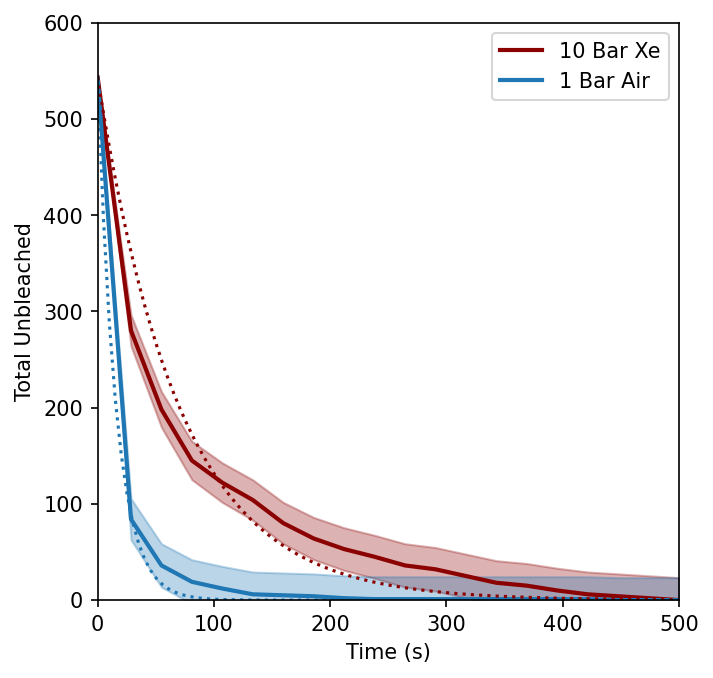

In [18]:
plt.figure(figsize=(5,5),dpi=150)
vars=np.linspace(0,500,100)
xcumXe=np.concatenate([[0],xsXe+(xsXe[1]-xsXe[0])*0.5])
ycumXe=np.sum(ysXe)*np.concatenate([[1],1.-np.cumsum(ysXe)/np.sum(ysXe)])
errcumXe=np.sum(ysXe)*np.concatenate([[0],np.cumsum(ysXe)**0.5/np.sum(ysXe)])
plt.plot(xcumXe,ycumXe,color='DarkRed',linewidth=2,label='10 Bar Xe')
plt.fill_between(xcumXe,ycumXe-errcumXe,ycumXe+errcumXe,color='DarkRed',alpha=0.3)

xcumAir=np.concatenate([[0],xsAir+(xsAir[1]-xsAir[0])*0.5])
ycumAir=np.sum(ysAir)*np.concatenate([[1],1.-np.cumsum(ysAir)/np.sum(ysAir)])
plt.plot(xcumAir,ycumAir,color='tab:blue',linewidth=2,label='1 Bar Air')
errcumAir=np.sum(ysAir)*np.concatenate([[0],np.cumsum(ysAir)**0.5/np.sum(ysAir)])
plt.fill_between(xcumAir,ycumAir-errcumAir,ycumAir+errcumAir,color='tab:blue',alpha=0.3)

plt.plot(vars,np.sum(ysAir)*np.exp(-vars/MeanAirLifetime),':',color='tab:blue',alpha=1)

plt.plot(vars,np.sum(ysXe)*np.exp(-vars/MeanXeLifetime),':',color='DarkRed',alpha=1)

plt.ylabel("Total Unbleached")
plt.xlabel("Time (s)")
plt.legend(loc='upper right')
plt.ylim(0,600)
plt.xlim(0,500)


141,2,271,351,


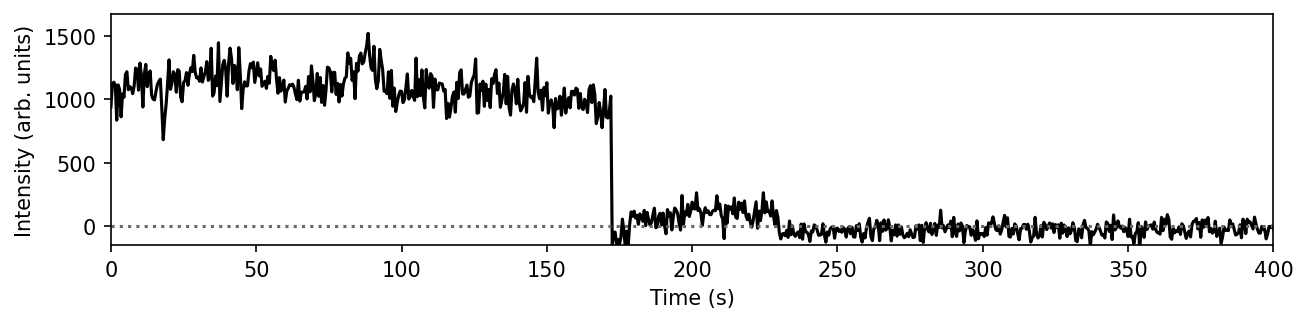

37,1,389,225,


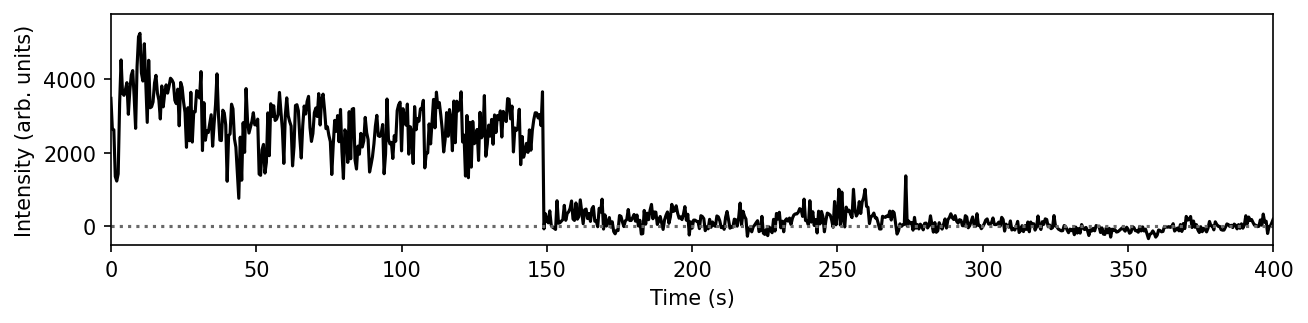

84,1,354,287,


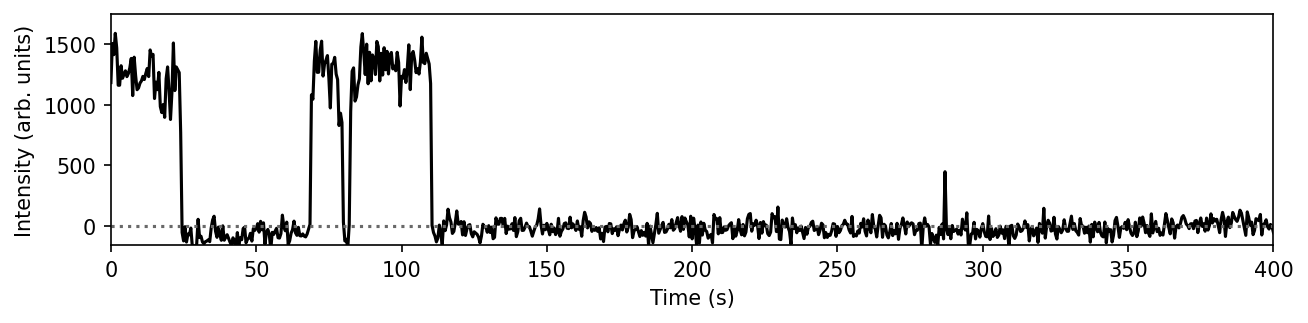

221,3,315,364,


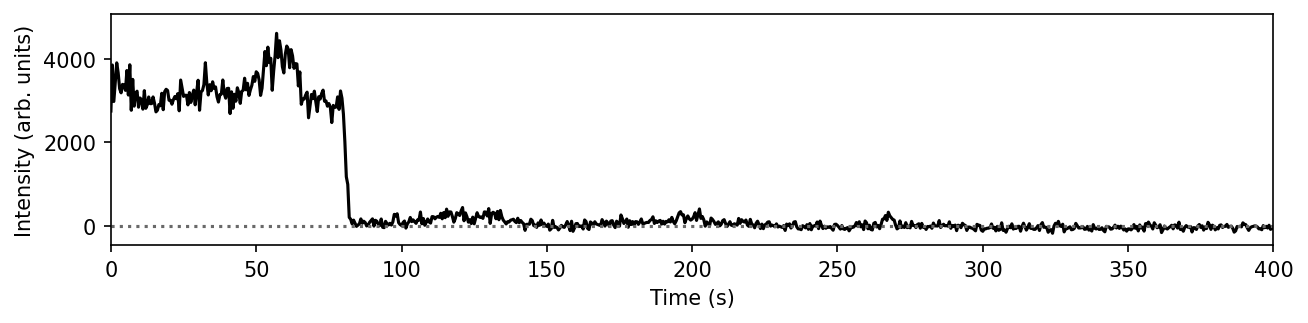

245,3,373,202,


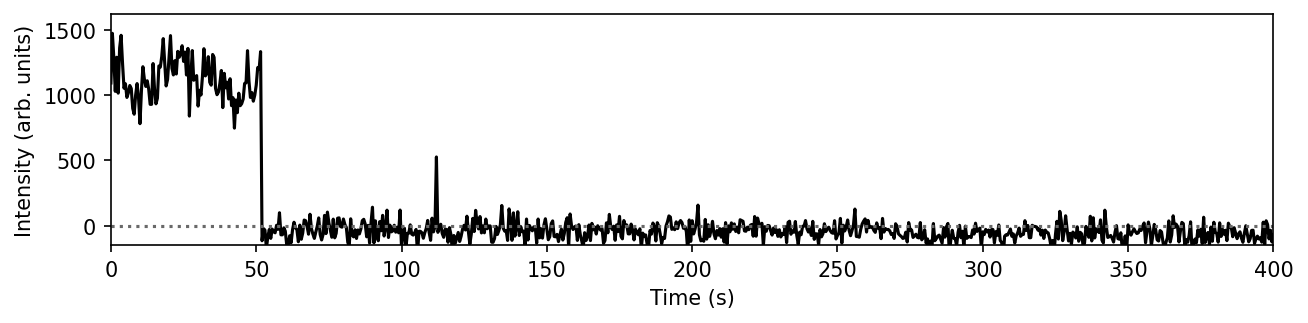

In [19]:
PickedOuti=[141,37,84,221,245]
Which='WithBa_Xe10bar_Long_1.dat'
#Make all the time traces
maxs=np.array([np.max(i) for i in dat[Which]['Traces']])
mins=np.array([np.min(i) for i in dat[Which]['Traces']])
stepfrac=np.array(dat[Which]['Heights'])/(maxs-mins)
selected=stepfrac>0.3

for i in PickedOuti:
    #if(stepfrac[i]>0.30):
        plt.figure(figsize=(10,2),dpi=150)
        plt.plot(np.arange(len(dat[Which]['Traces'][i]))*ExposureTime,dat[Which]['Traces'][i],color='black')
#        plt.title(str(i)+", "+str(dat[Which]['Heights'][i]))
        plt.xlabel("Time (s)")
        plt.ylabel("Intensity (arb. units)")
        plt.xlim(0,400)
        plt.plot([0,400],[0,0],':',color='dimgrey')
        plt.ylim(-0.1*np.max(dat[Which]['Traces'][i]),np.max(dat[Which]['Traces'][i])*1.1)
        print(str(i)+","+str(dat[Which]['Im'][i])+"," + str(dat[Which]['X'][i])+"," + str(dat[Which]['Y'][i])+"," )
        plt.savefig("Plots/SingleMolecules/Trace"+str(i)+".eps",dpi=200,bbox_inches='tight')
        plt.show()
        
